## Access Satellite Diffuse Attenuation Coefficent 1Day Noaa20 data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_diffuse_attenuation_coefficent_1day_noaa20 dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/37751f5b-3c93-40df-9913-951df310cbc8).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_diffuse_attenuation_coefficent_1day_noaa20.ipynb).

In [1]:
dataset_name = "satellite_diffuse_attenuation_coefficent_1day_noaa20"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Audited 256 packages in 25ms


✅ Local version 0.2.4 is up to date (remote: 0.2.4)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2989: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 497 ms, sys: 53.2 ms, total: 550 ms
Wall time: 2.5 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 797 ;
	latitude = 9601 ;
	longitude = 13601 ;

variables:
	float64 K_490(time, latitude, longitude) ;
		K_490:flag_applied = HISATZEN HIGLINT LAND CLDICE NAVFAIL ;
		K_490:long_name = Diffuse attenuation coefficient at 490 nm (OBPG) ;
		K_490:units = m^-1 ;
	<U37 filename(time) ;
	float64 latitude(latitude) ;
		latitude:axis = Y ;
		latitude:long_name = latitude ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float64 longitude(longitude) ;
		longitude:axis = X ;
		longitude:long_name = longitude ;
		longitude:standard_name = longitude ;
		longitude:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:axis = T ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = File initialised at 2025-01-26T19:25:05.776040
Initialised var K_490 at 2025-01-26T19:28:03.636665
Add Granule J20250101_0236.20250126160417.L2OC_VIIRS.K_490.nc at 2025-01-26T19:28:06.184132
Add

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2023-02-08 05:30:00'), Timestamp('2025-04-14 05:30:00'))

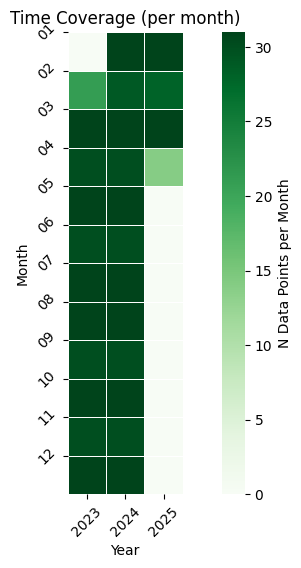

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='K_490', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2024-01-01', 
                                                  date_end='2024-12-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude")

CPU times: user 2.42 s, sys: 518 ms, total: 2.94 s
Wall time: 13.4 s


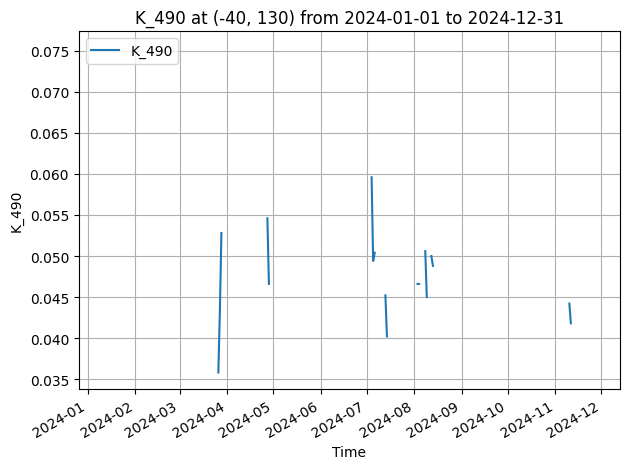

CPU times: user 2.13 s, sys: 563 ms, total: 2.7 s
Wall time: 14 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_timeseries(var_name='K_490', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2024-01-01', 
                                                  date_end='2024-12-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude")

## Plot a gridded variable

2025-08-11 17:15:26,897 - aodn.GetAodn - INFO - Plotting 'Diffuse attenuation coefficient at 490 nm (OBPG)' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2591: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


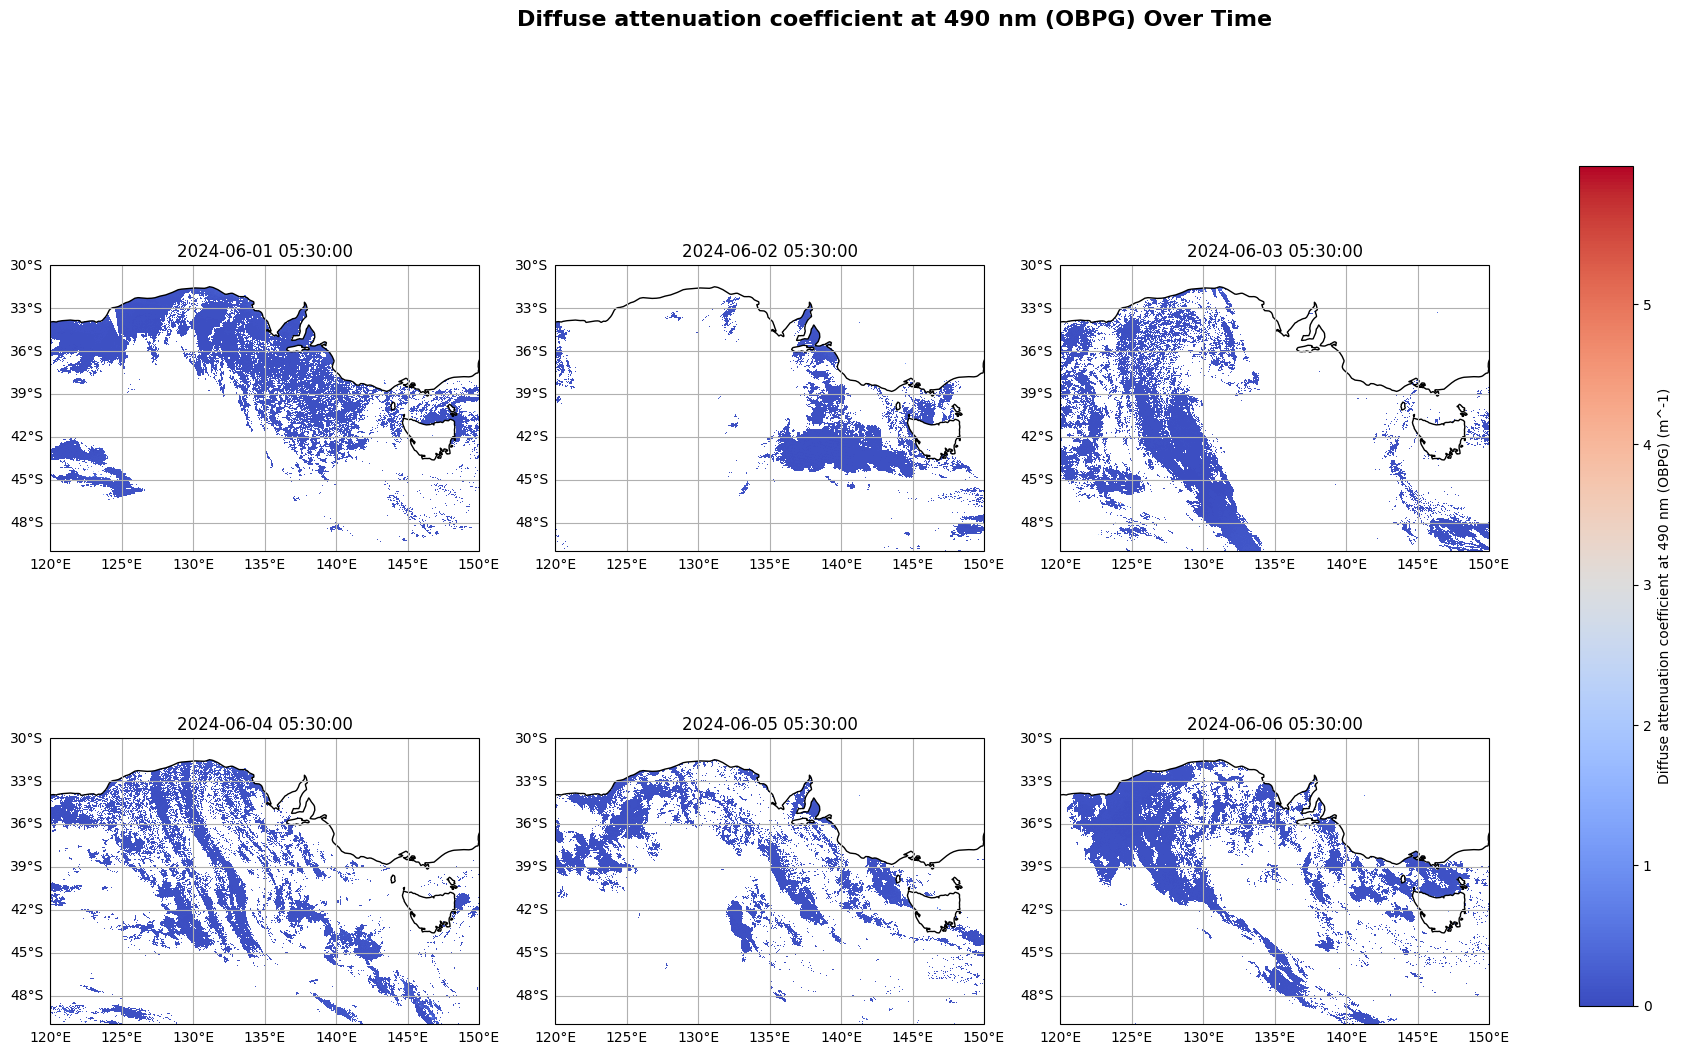

CPU times: user 30.3 s, sys: 17.6 s, total: 48 s
Wall time: 1min 6s


In [10]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='K_490', 
                                                    date_start='2024-06-01', 
                                                    lon_name_override="longitude", 
                                                    lat_name_override="latitude", 
                                                    lon_slice=(120, 150),
                                                    lat_slice=(-50, -30),
                                                    n_days=6, 
                                                    coastline_resolution="50m", 
                                                    log_scale=False)